In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "sicilia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,19,Sicilia,1,0,1,2,3,3,3,...,0.0,0.0,0.0,2.0,0.00,33.33,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,19,Sicilia,1,0,1,2,3,0,0,...,0.0,0.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,19,Sicilia,1,0,1,1,2,-1,1,...,0.0,0.0,0.0,-1.0,0.00,50.00,0.00,0.00,0.00,-33.33
3,2020-02-28T18:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,0.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,1.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2020-12-06T17:00:00,19,Sicilia,1367,213,1580,38166,39746,206,1022,...,36.0,8132.0,5023.0,241.0,13.48,3.98,12.57,20.35,-0.93,0.52
286,2020-12-07T17:00:00,19,Sicilia,1387,205,1592,38654,40246,500,918,...,34.0,8386.0,4828.0,488.0,12.88,3.96,10.95,19.01,-3.76,1.26
287,2020-12-08T17:00:00,19,Sicilia,1374,199,1573,37982,39555,-691,1148,...,36.0,9966.0,5880.0,-672.0,12.65,3.98,11.52,19.52,-2.93,-1.72
288,2020-12-09T17:00:00,19,Sicilia,1374,198,1572,37075,38647,-908,753,...,34.0,7013.0,4266.0,-907.0,12.60,4.07,10.74,17.65,-0.50,-2.30


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 10, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1059
Nuovi tamponi: 9526.0
Percentuale nuovi positivi/nuovi tamponi: 11.1 %
Nuovi guariti: 2705.0
Nuovi deceduti: 32.0
Variazione positivi ricoverati con sintomi: -32.0
Variazione positivi in terapia intensiva: -1.0
Variazione positivi in isolamento dimiciliare: -1645.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 10, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-11T17:00:00,19,Sicilia,388,38,426,3975,4401,258,297,...,1.0,4509.0,2777.0,254.0,8.92,9.68,6.59,10.69,8.57,6.23
1,2020-10-12T17:00:00,19,Sicilia,404,42,446,4236,4682,281,298,...,3.0,3892.0,2374.0,261.0,9.42,9.53,7.66,12.55,10.53,6.38
2,2020-10-13T17:00:00,19,Sicilia,426,44,470,4407,4877,195,334,...,2.0,8340.0,5205.0,171.0,9.36,9.64,4.00,6.42,4.76,4.16
3,2020-10-14T17:00:00,19,Sicilia,447,49,496,4691,5187,310,366,...,2.0,7021.0,4394.0,284.0,9.88,9.56,5.21,8.33,11.36,6.36
4,2020-10-15T17:00:00,19,Sicilia,468,52,520,4967,5487,300,399,...,7.0,7444.0,4639.0,276.0,10.00,9.48,5.36,8.60,6.12,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-06T17:00:00,19,Sicilia,1367,213,1580,38166,39746,206,1022,...,36.0,8132.0,5023.0,241.0,13.48,3.98,12.57,20.35,-0.93,0.52
57,2020-12-07T17:00:00,19,Sicilia,1387,205,1592,38654,40246,500,918,...,34.0,8386.0,4828.0,488.0,12.88,3.96,10.95,19.01,-3.76,1.26
58,2020-12-08T17:00:00,19,Sicilia,1374,199,1573,37982,39555,-691,1148,...,36.0,9966.0,5880.0,-672.0,12.65,3.98,11.52,19.52,-2.93,-1.72
59,2020-12-09T17:00:00,19,Sicilia,1374,198,1572,37075,38647,-908,753,...,34.0,7013.0,4266.0,-907.0,12.60,4.07,10.74,17.65,-0.50,-2.30


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

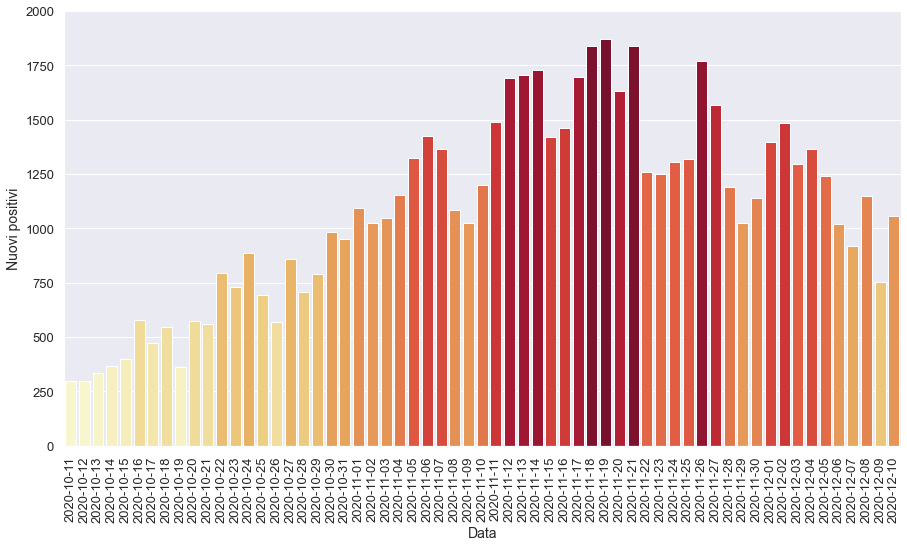

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

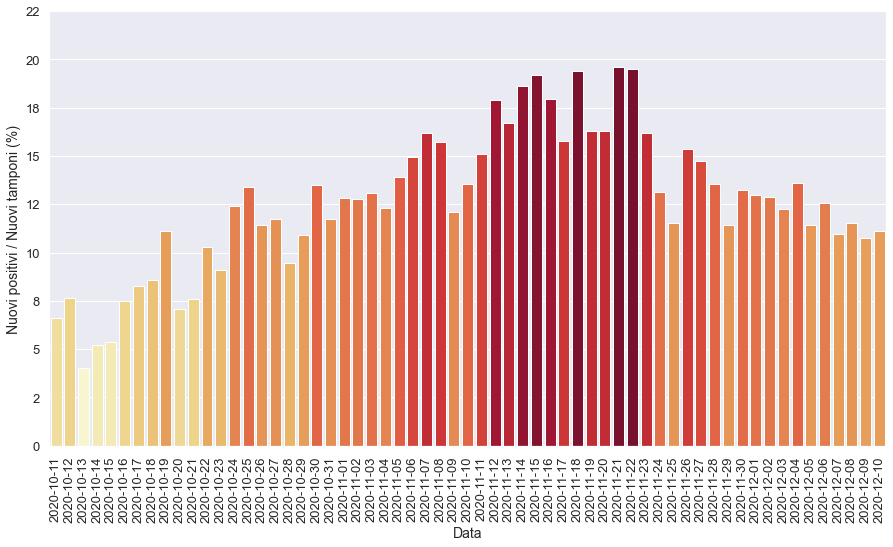

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

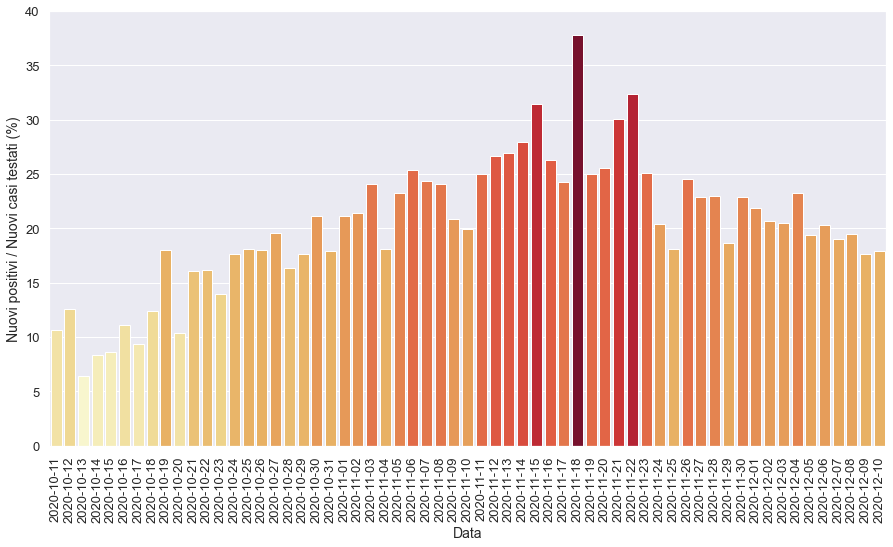

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

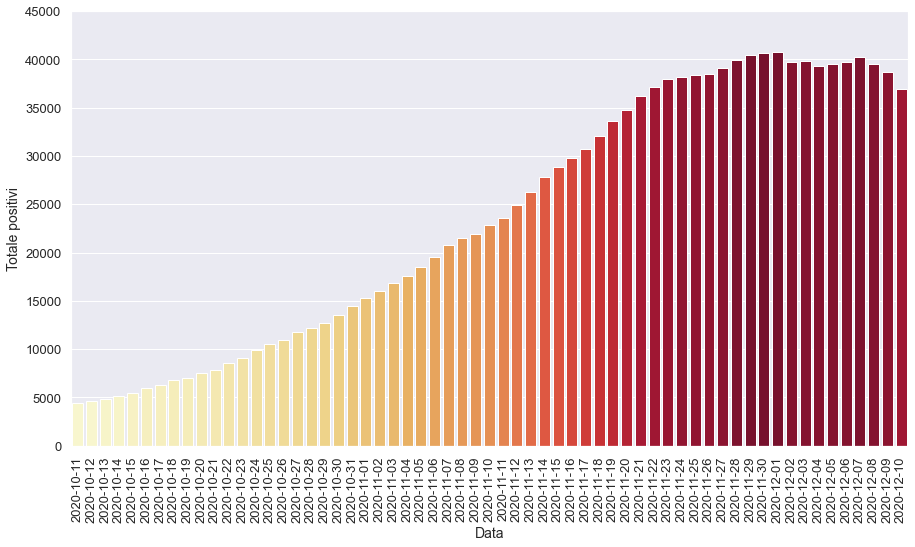

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

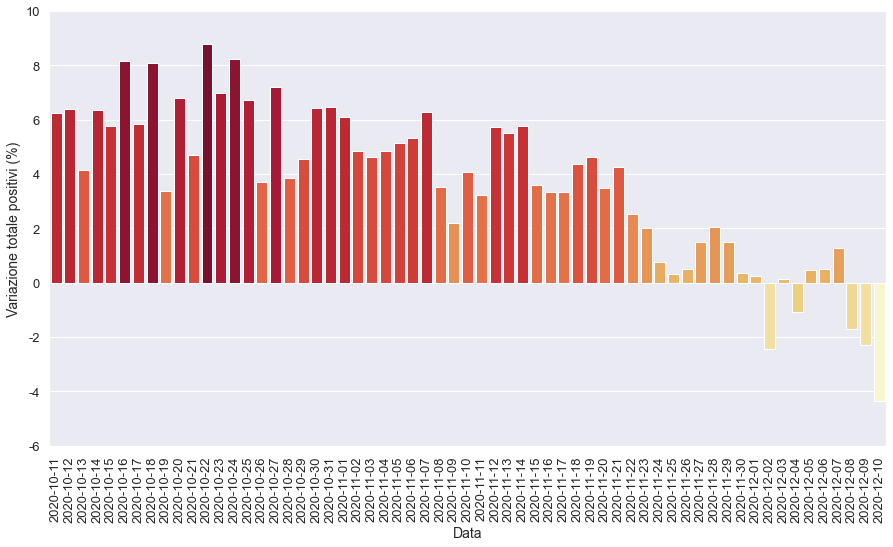

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

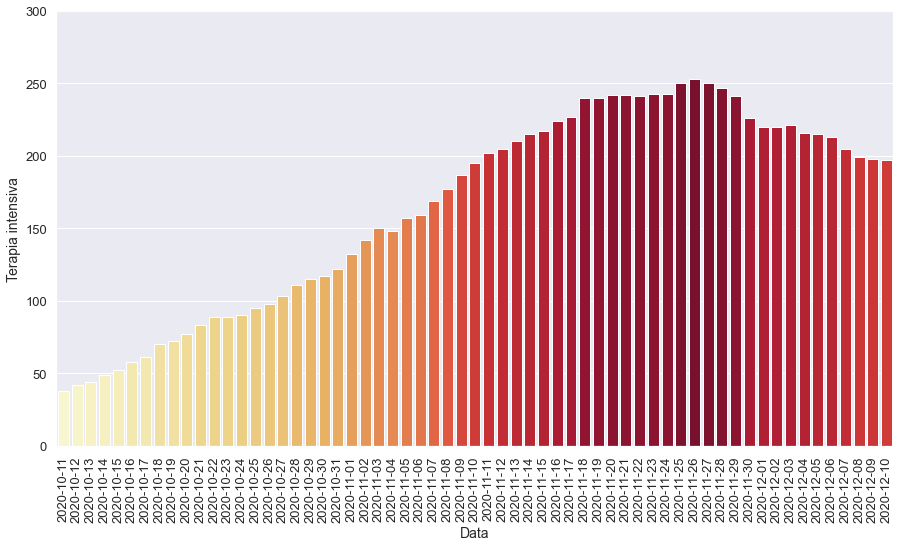

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

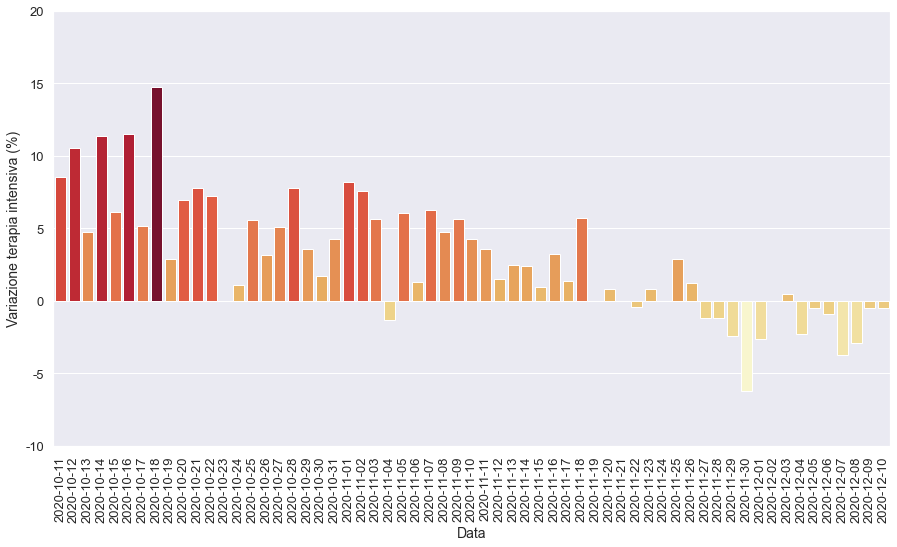

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

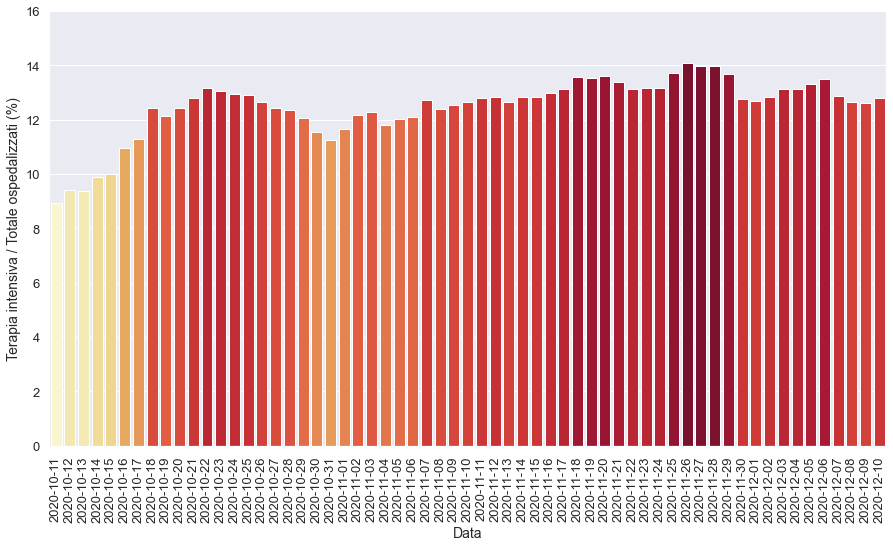

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

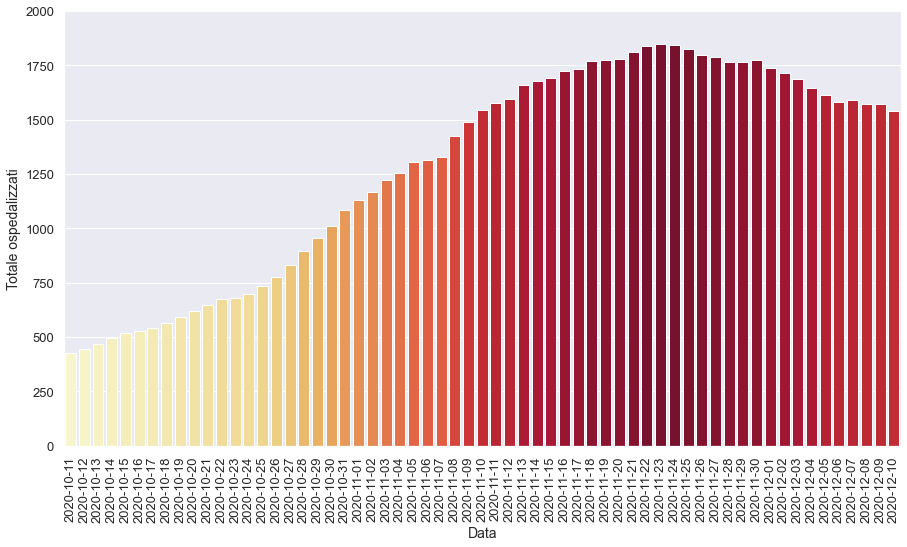

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

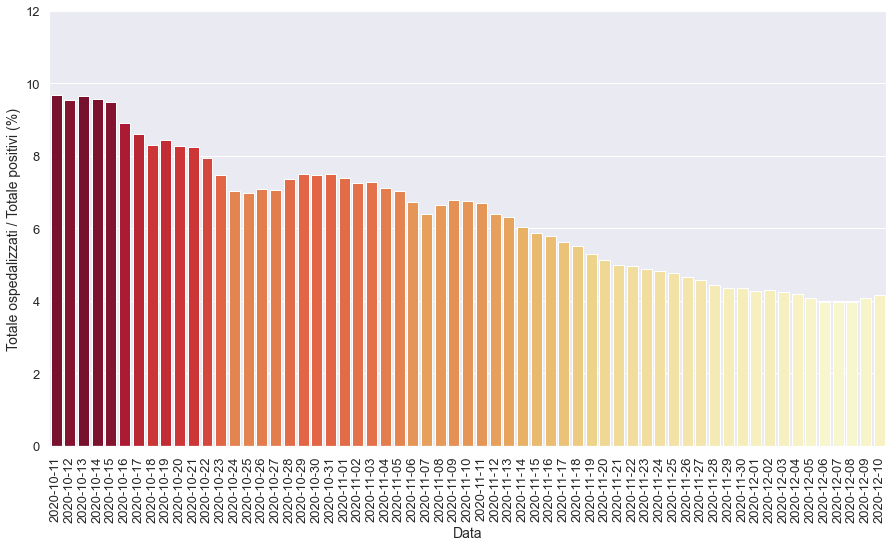

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

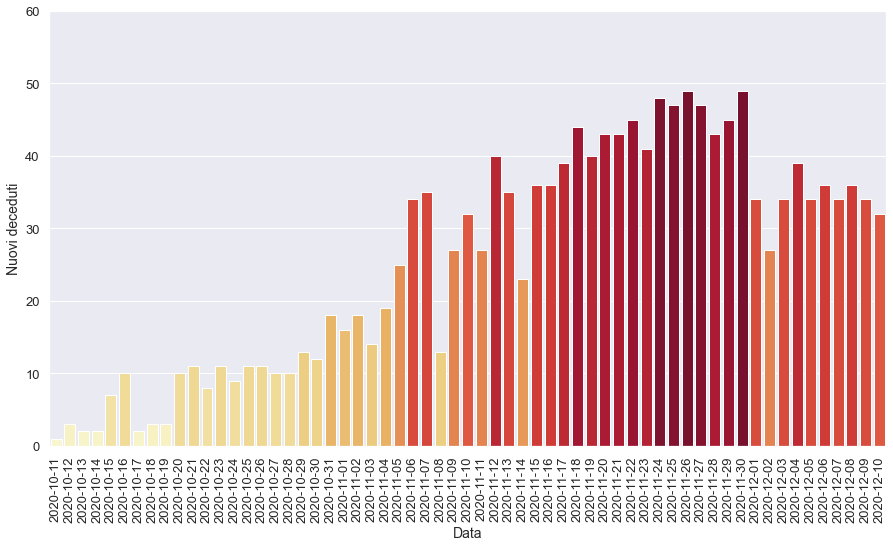

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

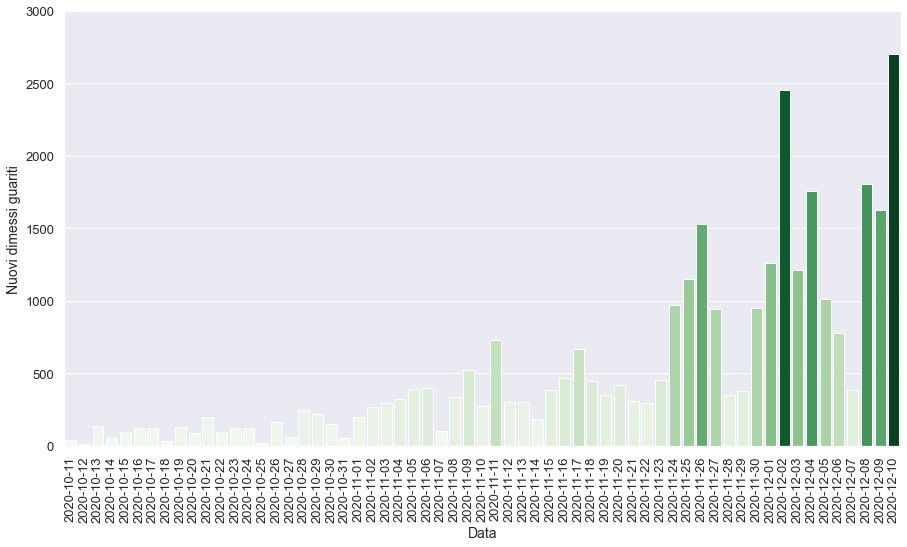

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,19,Sicilia,1348,195,1543,21289,22832,893,1201,...,32.0,8856.0,6013.0,840.0,12.64,6.76,13.56,19.97,4.28,4.07
1,2020-11-11T17:00:00,19,Sicilia,1376,202,1578,21986,23564,732,1487,...,27.0,9839.0,5956.0,697.0,12.80,6.70,15.11,24.97,3.59,3.21
2,2020-11-12T17:00:00,19,Sicilia,1391,205,1596,23318,24914,1350,1692,...,40.0,9455.0,6337.0,1332.0,12.84,6.41,17.90,26.70,1.49,5.73
3,2020-11-13T17:00:00,19,Sicilia,1450,210,1660,24626,26286,1372,1707,...,35.0,10217.0,6343.0,1308.0,12.65,6.32,16.71,26.91,2.44,5.51
4,2020-11-14T17:00:00,19,Sicilia,1462,215,1677,26129,27806,1520,1729,...,23.0,9274.0,6179.0,1503.0,12.82,6.03,18.64,27.98,2.38,5.78
5,2020-11-15T17:00:00,19,Sicilia,1476,217,1693,27114,28807,1001,1422,...,36.0,7416.0,4517.0,985.0,12.82,5.88,19.17,31.48,0.93,3.60
6,2020-11-16T17:00:00,19,Sicilia,1501,224,1725,28040,29765,958,1461,...,36.0,8151.0,5564.0,926.0,12.99,5.80,17.92,26.26,3.23,3.33
7,2020-11-17T17:00:00,19,Sicilia,1505,227,1732,29024,30756,991,1698,...,39.0,10774.0,7001.0,984.0,13.11,5.63,15.76,24.25,1.34,3.33
8,2020-11-18T17:00:00,19,Sicilia,1528,240,1768,30334,32102,1346,1837,...,44.0,9479.0,4867.0,1310.0,13.57,5.51,19.38,37.74,5.73,4.38
9,2020-11-19T17:00:00,19,Sicilia,1532,240,1772,31809,33581,1479,1871,...,40.0,11470.0,7475.0,1475.0,13.54,5.28,16.31,25.03,0.00,4.61


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

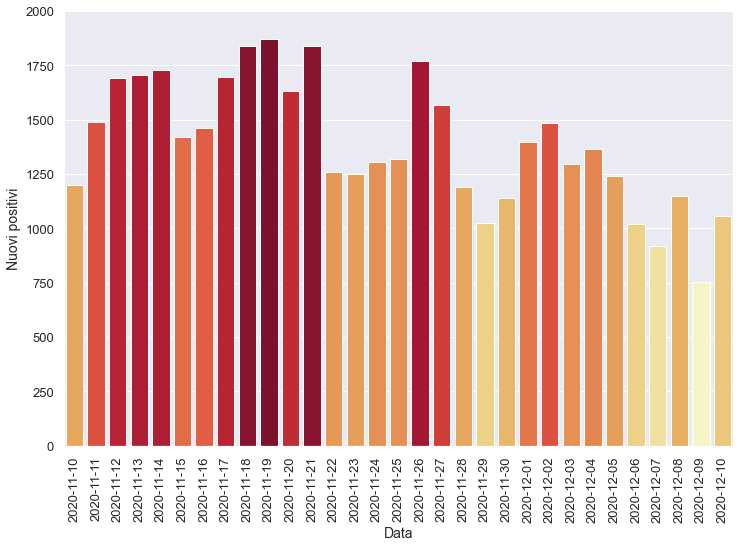

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

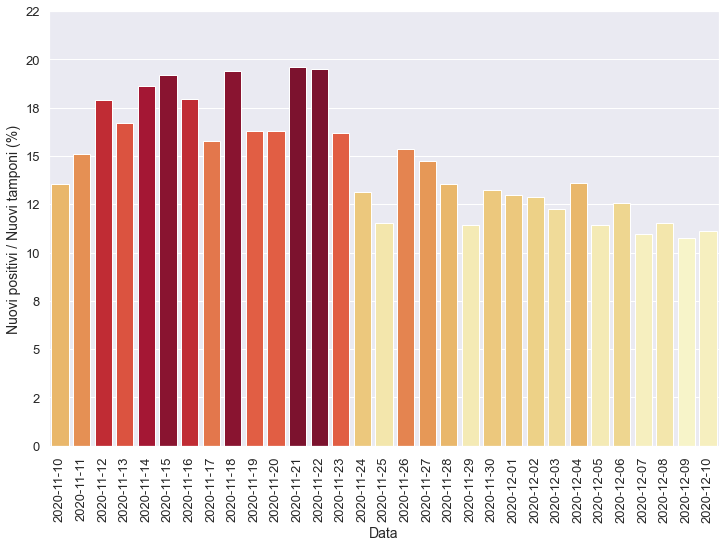

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

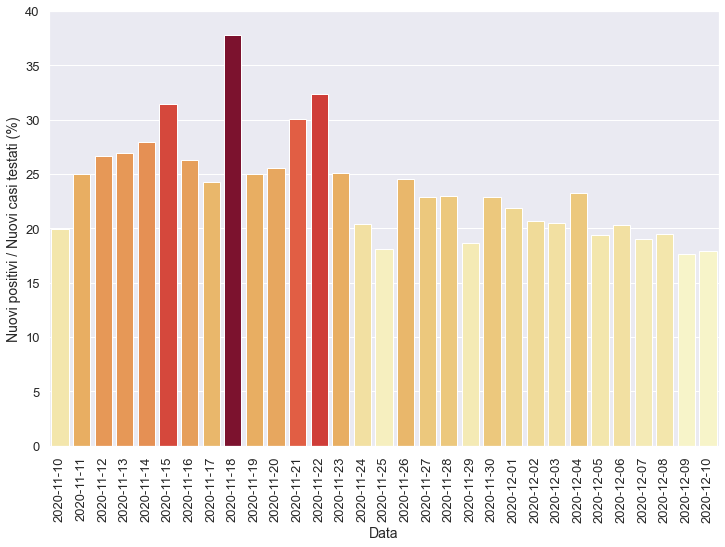

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

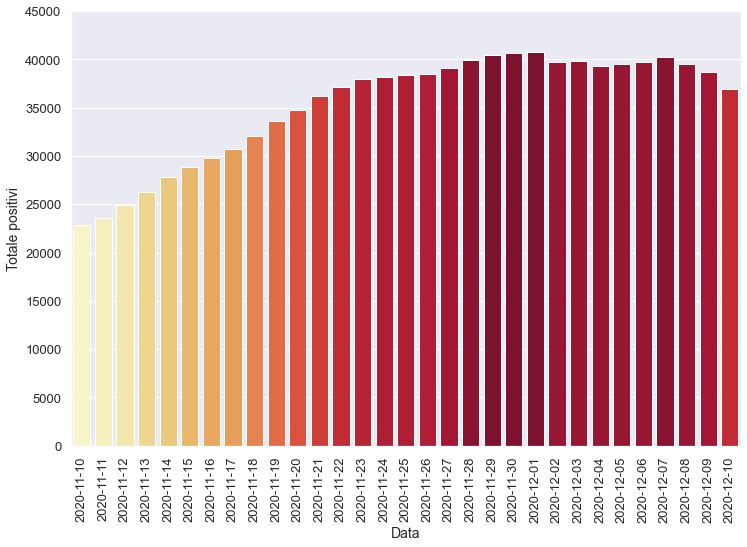

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

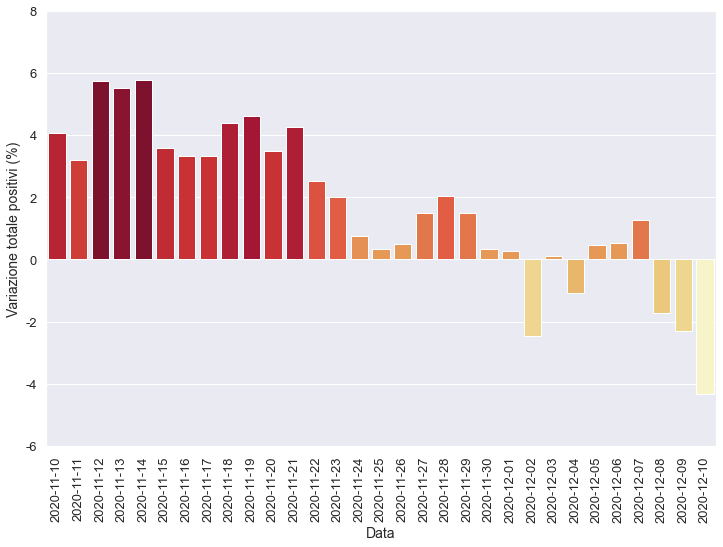

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

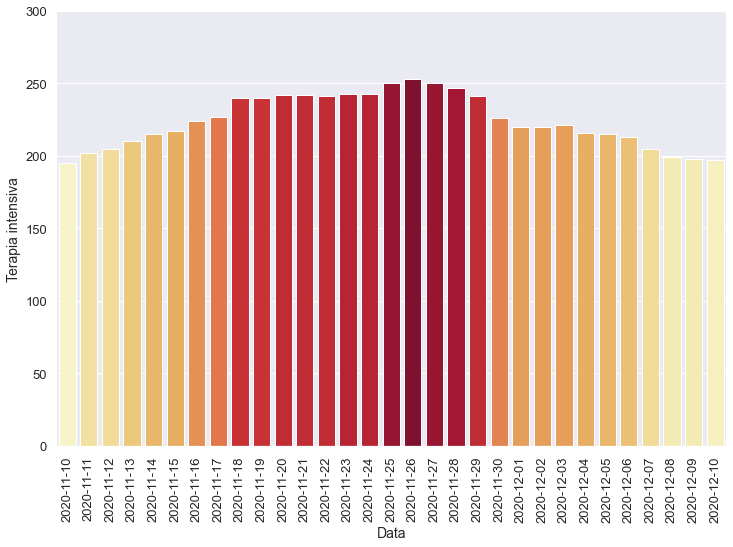

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

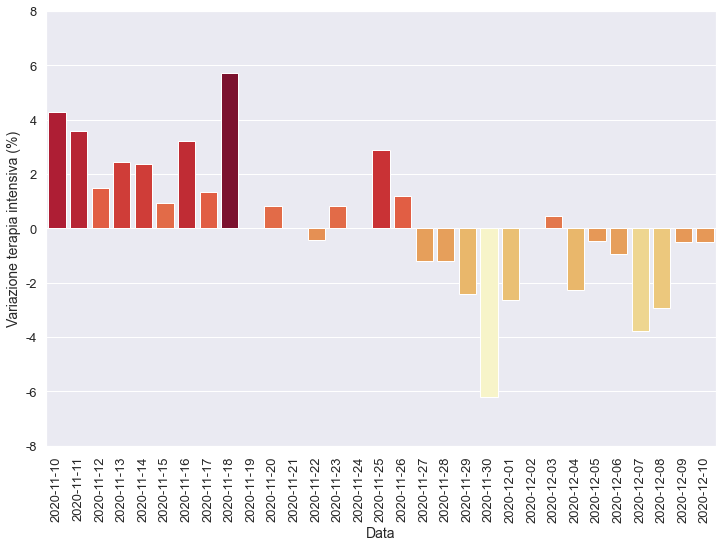

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

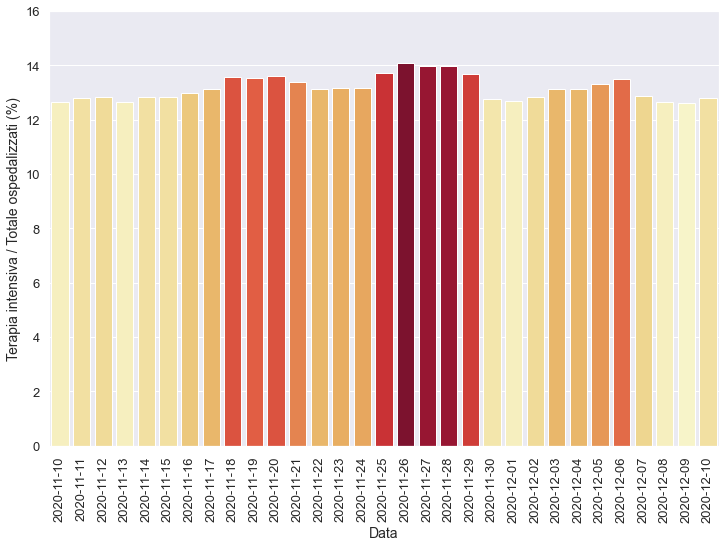

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

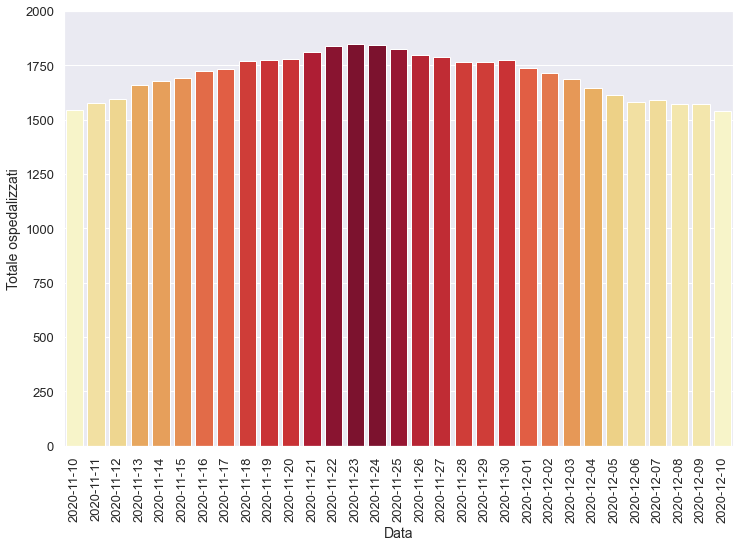

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

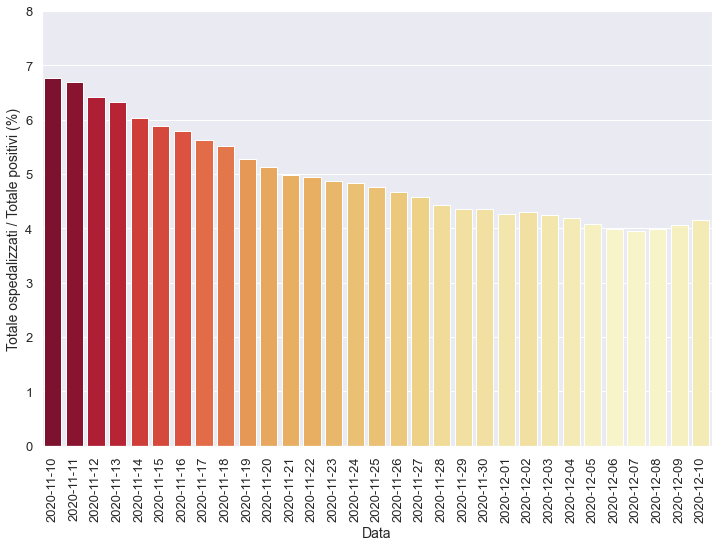

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

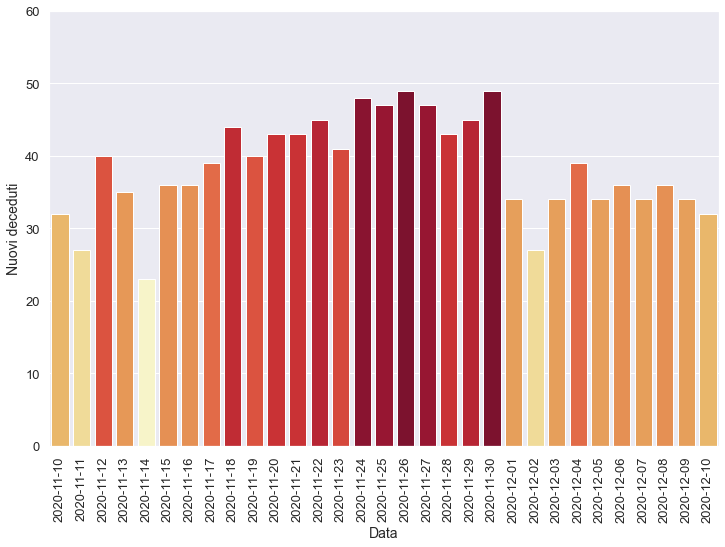

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

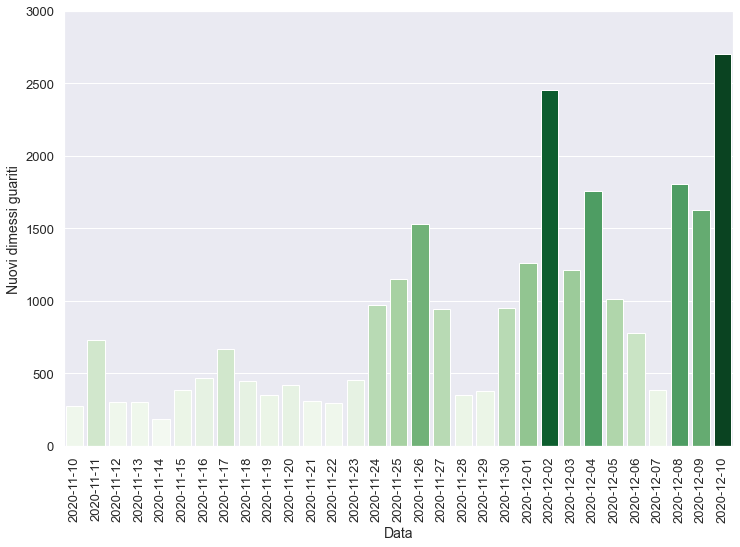

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-03T17:00:00,19,Sicilia,1465,221,1686,38094,39780,49,1294,...,34.0,10581.0,6329.0,77.0,13.11,4.24,12.23,20.45,0.45,0.12
1,2020-12-04T17:00:00,19,Sicilia,1431,216,1647,37703,39350,-430,1365,...,39.0,10026.0,5870.0,-391.0,13.11,4.19,13.61,23.25,-2.26,-1.08
2,2020-12-05T17:00:00,19,Sicilia,1400,215,1615,37925,39540,190,1240,...,34.0,10875.0,6398.0,222.0,13.31,4.08,11.40,19.38,-0.46,0.48
3,2020-12-06T17:00:00,19,Sicilia,1367,213,1580,38166,39746,206,1022,...,36.0,8132.0,5023.0,241.0,13.48,3.98,12.57,20.35,-0.93,0.52
4,2020-12-07T17:00:00,19,Sicilia,1387,205,1592,38654,40246,500,918,...,34.0,8386.0,4828.0,488.0,12.88,3.96,10.95,19.01,-3.76,1.26
5,2020-12-08T17:00:00,19,Sicilia,1374,199,1573,37982,39555,-691,1148,...,36.0,9966.0,5880.0,-672.0,12.65,3.98,11.52,19.52,-2.93,-1.72
6,2020-12-09T17:00:00,19,Sicilia,1374,198,1572,37075,38647,-908,753,...,34.0,7013.0,4266.0,-907.0,12.60,4.07,10.74,17.65,-0.50,-2.30
7,2020-12-10T17:00:00,19,Sicilia,1342,197,1539,35430,36969,-1678,1059,...,32.0,9526.0,5923.0,-1645.0,12.80,4.16,11.12,17.88,-0.51,-4.34


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

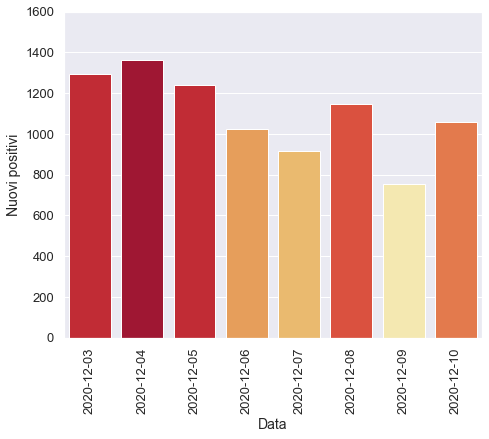

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

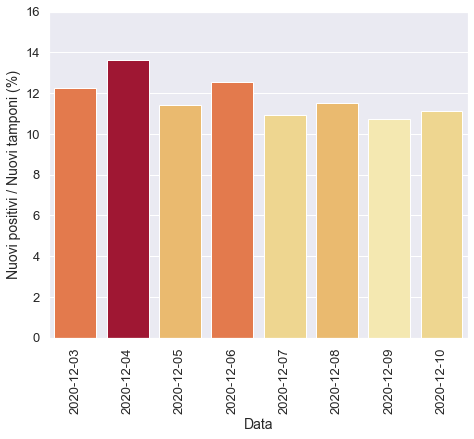

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

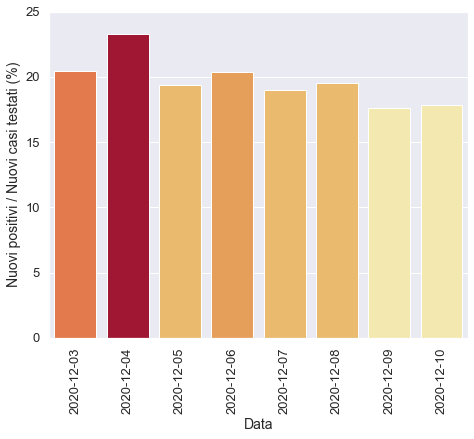

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

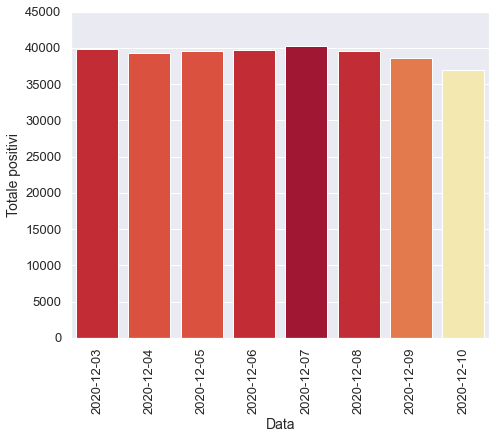

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

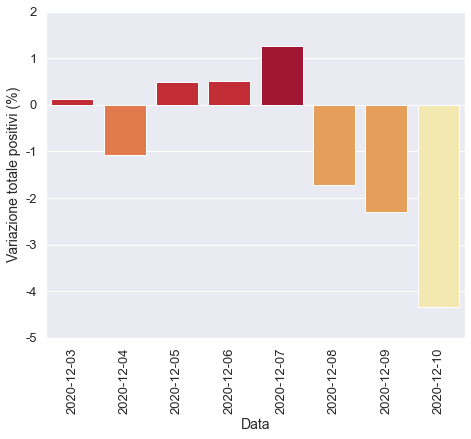

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

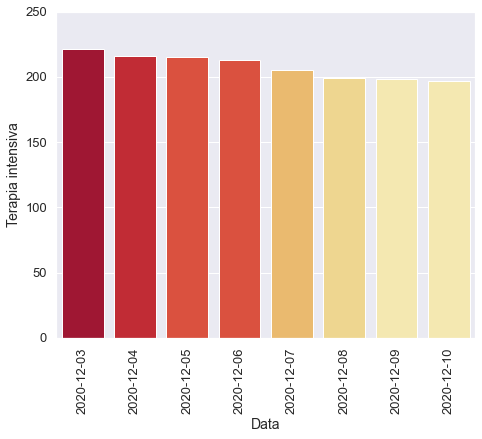

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

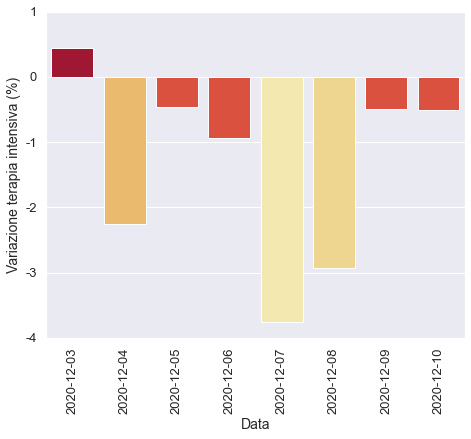

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

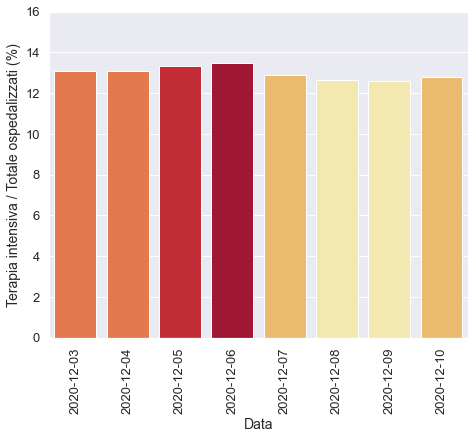

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

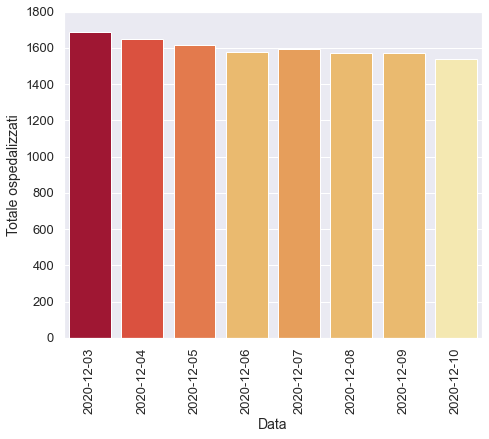

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

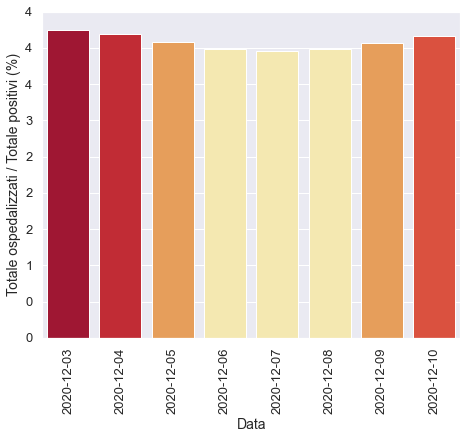

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

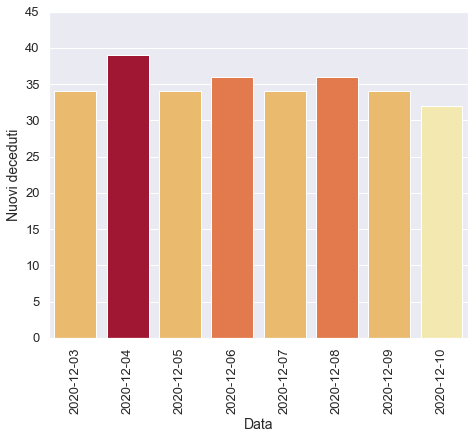

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

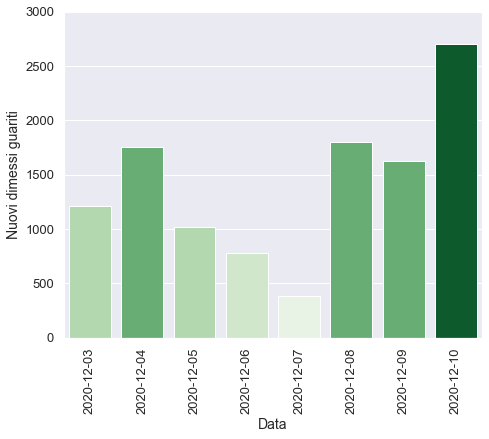

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)